<center><h2>Decision Trees Regression</h2></center>

<center><img src="http://www.clear-lines.com/blog/image.axd?picture=RhymesWithOrange.jpg" width="95%"/></center>

By The End Of This Session You Should Be Able To:
----

- Compare Classification Trees to Regression Trees
- Compare Random Forest™ Regression to Linear Regression

Classification Trees
----

- Predict: class label
- Training: minimize impurity
- Inference: assign majority class label of leaf node

Regression Trees
------

- Predict: value
- Training: minimize error (typically mean squared)
- Inference: mean of the leaf node

Regression Trees: Example
----

<center><img src="images/data.png" width="25%"/></center>

Check for understanding
-----

Without splitting (aka, using features), what would be the best guess to predict $y$?

In [3]:
reset -fs

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn

import warnings
warnings.filterwarnings('ignore')

palette = "Dark2"
%matplotlib inline

In [5]:
mean = (1 + 2 + 3 + 4) / 4 
print(mean)

2.5


What would be our squared error?

 $$ E = (1-2.5)^2 + (2-2.5)^2 + (3-2.5)^2 + (4-2.5)^2  = 5$$

In [6]:
y = [1, 2, 3, 4]
error = 0

for num in y:
    error += (num - mean)**2
print(error)

5.0


Check for understanding
-----

<center><img src="images/data.png" width="25%"/></center>

Let's split on x<sub>1</sub>, what would be the best guess to predict $y$ for each node?

In [7]:
y_when_x_1_equals_1 = [1, 3]
sum(y_when_x_1_equals_1)/len(y_when_x_1_equals_1)

2.0

In [8]:
y_when_x_1_equals_0 = [2, 4]
sum(y_when_x_1_equals_0)/len(y_when_x_1_equals_0)

3.0

What would be our squared error?



 $$ E = (1-2)^2 + (3-2)^2 + (2-3)^2 + (4-3)^2 = 4 $$

Check for understanding
-----

Would slitting x<sub>1</sub> be better than not splitting?

Yes - We have reduced our error!

What about splitting on x<sub>2</sub>? What is the error?
-----

In [9]:
y_when_x_2_equals_1 = [1, 4]
sum(y_when_x_2_equals_1)/len(y_when_x_2_equals_1)

2.5

In [10]:
y_when_x_2_equals_0 = [2, 3]
sum(y_when_x_2_equals_0)/len(y_when_x_2_equals_0)

2.5

$$ E = (1-2.5)^2 + (4-2.5)^2 + (2-2.5)^2 + (3-2.5)^2 = 5 $$

In [11]:
 (1-2.5)**2 + (4-2.5)**2 + (2-2.5)**2 + (3-2.5)**2

5.0

Since 4 is less than 5, it better to split on x<sub>1</sub> than x<sub>2</sub>.

Regression Trees: Prediction
----

If we got new data point where x<sub>1</sub> equaled 1, what would be predict the y value to be?

2 

<center><h2>Regression Trees: Prediction</h2></center>

<center><img src="images/tree.png" width="55%"/></center>

For each region, predict the average score.

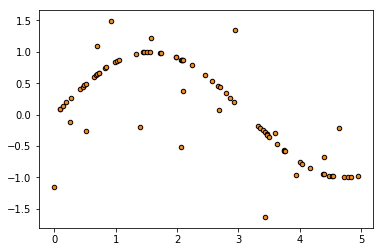

In [12]:
# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# Plot the results
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data");

In [13]:
# Fit regression model
from sklearn.tree import DecisionTreeRegressor

regr_1 = DecisionTreeRegressor(max_depth=2).fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)

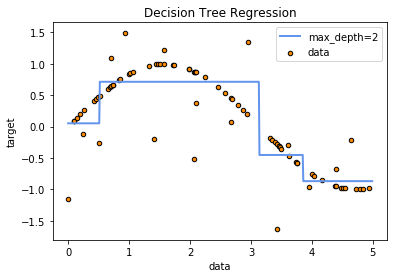

In [14]:
# Plot the results
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
plt.xlabel("data"); plt.ylabel("target"); plt.title("Decision Tree Regression");plt.legend(); plt.show();

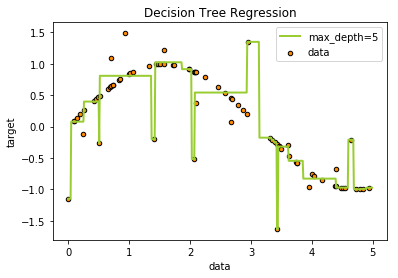

In [15]:
regr_2 = DecisionTreeRegressor(max_depth=5).fit(X, y)
y_2 = regr_2.predict(X_test)

# Plot the results
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data"); plt.ylabel("target"); plt.title("Decision Tree Regression");plt.legend(); plt.show();

Source: https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html

<center><h2>Easy to Overfit Decision Trees</h2></center>

<center><h2>Regression: OLS vs Random Forest™</h2></center>

In [16]:
reset -fs

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn

import warnings
warnings.filterwarnings('ignore')

palette = "Dark2"
%matplotlib inline

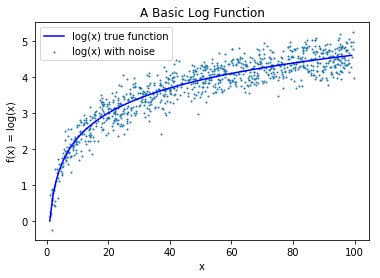

In [18]:
x = np.random.uniform(1, 100, 1_000).reshape(-1, 1)
y = np.log(x) + np.random.normal(0, .3, 1_000).reshape(-1, 1)

plt.scatter(x, y, s=1, label="log(x) with noise")
plt.plot(np.arange(1, 100), np.log(np.arange(1, 100)), c="b", label="log(x) true function")
plt.xlabel("x")
plt.ylabel("f(x) = log(x)")
plt.legend(loc="best")
plt.title("A Basic Log Function")
plt.show() 

Source: 

- http://blog.yhat.com/posts/random-forests-in-python.html
- https://gist.github.com/glamp/5716253

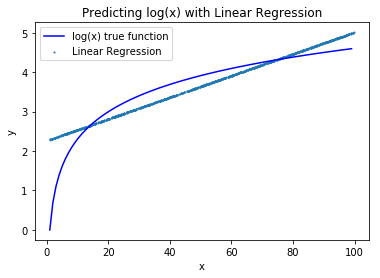

In [19]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression().fit(x, y)
y_predicted = lr.predict(x)

plt.scatter(x, y_predicted, s=1, label="Linear Regression")
plt.plot(np.arange(1, 100), np.log(np.arange(1, 100)), c="b", label="log(x) true function")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc="best")
plt.title("Predicting log(x) with Linear Regression")
plt.show() 

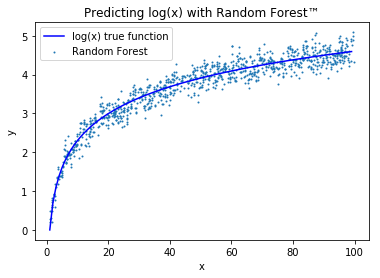

In [20]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor().fit(x, y)
y_predicted = rf.predict(x)

plt.scatter(x, y_predicted, s=1, label="Random Forest")
plt.plot(np.arange(1, 100), np.log(np.arange(1, 100)), c="b", label="log(x) true function")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc="best")
plt.title("Predicting log(x) with Random Forest™")
plt.show() 

<center><h2>Which algorithm would you use?</h2></center>

Points to consider
------

- Which algorithm has lower bias?
- Which algorithm has lower variance?
- Which algorithm needs less data manipulation?
- Which algorithm needs less tuning?

As a working Data Scientist, you'll need to fit useful models quickly.

When is a Linear Regression (LR) better than a Random Forest™?
------

- With very small data (5-100 examples), RF is more likely to over-fit than LR.
- When the underlying relationship is truly linear, LR will be a more parsimoniousness model.
- LR might train faster than RF:
    - OLS is much faster than recursive partitioning.
    - SGD is often faster than recursive partitioning.

Sidebar: Random forest can learn arbitrary relationships between the features and the outcome, even non-monotonic relationships. Simple Linear Regression models only monotonic relationships.

Source: 
- https://datascience.stackexchange.com/questions/1028/do-random-forest-overfit
- https://www.quora.com/When-are-random-forests-RFs-better-than-linear-regression-models-Do-RFs-fit-nonlinear-data-better-from-the-get-go-without-a-plotting-transform-dance-Are-there-other-cases-where-I-should-use-RF-instead-of-trusty-old-linear-models

Summary
-----

- Tree-based methods can be used for classification or regression
- When tree-based methods are used for regression:
    - During training, we split based on features that will lower the squared error loss function.
    - During prediction, we predict the average score based on the decision bounds.

<br>